In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kagglecatsanddogs_3367a']


# Cats and Dogs with CNN TensorFlow

This notebook is to recreate the code from [pythonprogramming.net](https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/) tutorials. The goal is to understand the code and how CNN models works in classifying and image of a cats or dogs using the Cats and Dogs [dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import time


## Data

In [3]:
DATADIR = '../input/kagglecatsanddogs_3367a/PetImages'
CATEGORIES = ['Dog','Cat']

## Preprocess Dataset

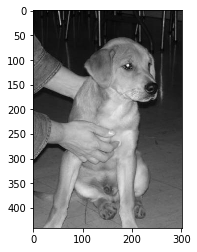

In [4]:
#Iterate and convert datasets to an array.

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dataset directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
# Checking Data
print('Data Array:\n',img_array,'\n')
print('Data Shape:',img_array.shape)

Data Array:
 [[ 23  14   8 ...  39  38  37]
 [ 23  14   8 ...  40  40  39]
 [ 23  14   8 ...  41  41  40]
 ...
 [126 126 126 ... 118 118 118]
 [125 124 122 ... 118 117 116]
 [122 121 120 ... 115 114 113]] 

Data Shape: (441, 301)


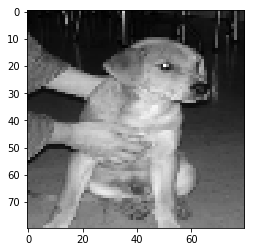

In [6]:
# Resize the image
IMG_SIZE = 80
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
# Create dataset for training

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) # categories for dog(0) and cat(1)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()

In [8]:
print(len(training_data))

24946


In [9]:
# Reshuffle Data
random.shuffle(training_data)

# Check the shuffled data
for sample in training_data [:10]:
    print(sample[1])

1
0
1
1
1
1
0
0
0
1


In [10]:
# Create list for training data
X = [] # feature dataset
y = [] # label dataset

for features, label in training_data:
    X.append(features)
    y.append(label)

# Convert X to an array since you can't pass it to a neural network
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X[:1])

[[[[12]
   [16]
   [20]
   ...
   [17]
   [19]
   [18]]

  [[11]
   [17]
   [22]
   ...
   [16]
   [21]
   [20]]

  [[ 9]
   [14]
   [20]
   ...
   [19]
   [16]
   [23]]

  ...

  [[26]
   [26]
   [24]
   ...
   [33]
   [25]
   [27]]

  [[25]
   [28]
   [23]
   ...
   [26]
   [25]
   [25]]

  [[31]
   [37]
   [38]
   ...
   [30]
   [30]
   [27]]]]


In [11]:
# Save traing set using pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
# Open pickle file

pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)
X[1]

array([[[  8],
        [ 14],
        [ 12],
        ...,
        [  9],
        [ 38],
        [ 17]],

       [[ 26],
        [ 26],
        [ 30],
        ...,
        [ 12],
        [ 15],
        [ 22]],

       [[ 18],
        [ 23],
        [ 19],
        ...,
        [ 41],
        [ 48],
        [ 54]],

       ...,

       [[114],
        [105],
        [115],
        ...,
        [111],
        [ 93],
        [ 89]],

       [[ 85],
        [ 86],
        [ 92],
        ...,
        [119],
        [115],
        [102]],

       [[101],
        [ 93],
        [ 82],
        ...,
        [ 90],
        [111],
        [ 90]]], dtype=uint8)

## The Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [14]:
# Callback Name for Tensorboard

In [15]:
# Optimizing GPU


In [16]:
# Load saved datasets

pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [17]:
# Normalized Datasets
X = X/255.0

In [20]:
# Build Model

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #to convert 3D feature map to 1D
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 5s 311us/step - loss: 0.6154 - acc: 0.6517 - val_loss: 0.5293 - val_acc: 0.7322
Epoch 2/10
17462/17462 [==============================] - 5s 296us/step - loss: 0.5012 - acc: 0.7579 - val_loss: 0.4803 - val_acc: 0.7712
Epoch 3/10
17462/17462 [==============================] - 5s 293us/step - loss: 0.4435 - acc: 0.7941 - val_loss: 0.4678 - val_acc: 0.7818
Epoch 4/10
17462/17462 [==============================] - 5s 291us/step - loss: 0.3873 - acc: 0.8276 - val_loss: 0.4570 - val_acc: 0.7886
Epoch 5/10
17462/17462 [==============================] - 5s 291us/step - loss: 0.3153 - acc: 0.8614 - val_loss: 0.4750 - val_acc: 0.7897
Epoch 6/10
17462/17462 [==============================] - 5s 294us/step - loss: 0.2384 - acc: 0.9006 - val_loss: 0.4970 - val_acc: 0.7966
Epoch 7/10
17462/17462 [==============================] - 5s 294us/step - loss: 0.1635 - acc: 0.9360 - val_loss: 0.5840 - v